In [28]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import re
import string
import requests
import pycountry
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings("ignore")

import os
from PIL import Image

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 100)

In [29]:
df = pd.read_csv(r'D:\Tugas Akhir\Text Mining\Data\Data TA\Script TA\Klasifikasi\data set .csv',sep=',', encoding='utf-8')
df.head()

,tittle,review,stars
0,Harapkan biaya bagasi melebihi harga tiket Anda.,Anda tidak dapat membayar bagasi secara online...,1
1,"Lagi, dan lagi, tahun demi tahun, Maskapai dan...",Biasanya seringkali keterlambatan atau delay t...,1
2,"Ekonomis dan banyak jadwal, check-in awal ngti...",Tidak lagi mengalami delay (4 flight Jkt-Bpn P...,4
3,Harga Wajar dengan Layanan Adil,"""Anda mendapatkan apa yang Anda bayar"" menggam...",4
4,Periksa dengan cermat siapa yang mengoperasika...,karena dalam hal jatah bagasi ada perbedaan be...,1


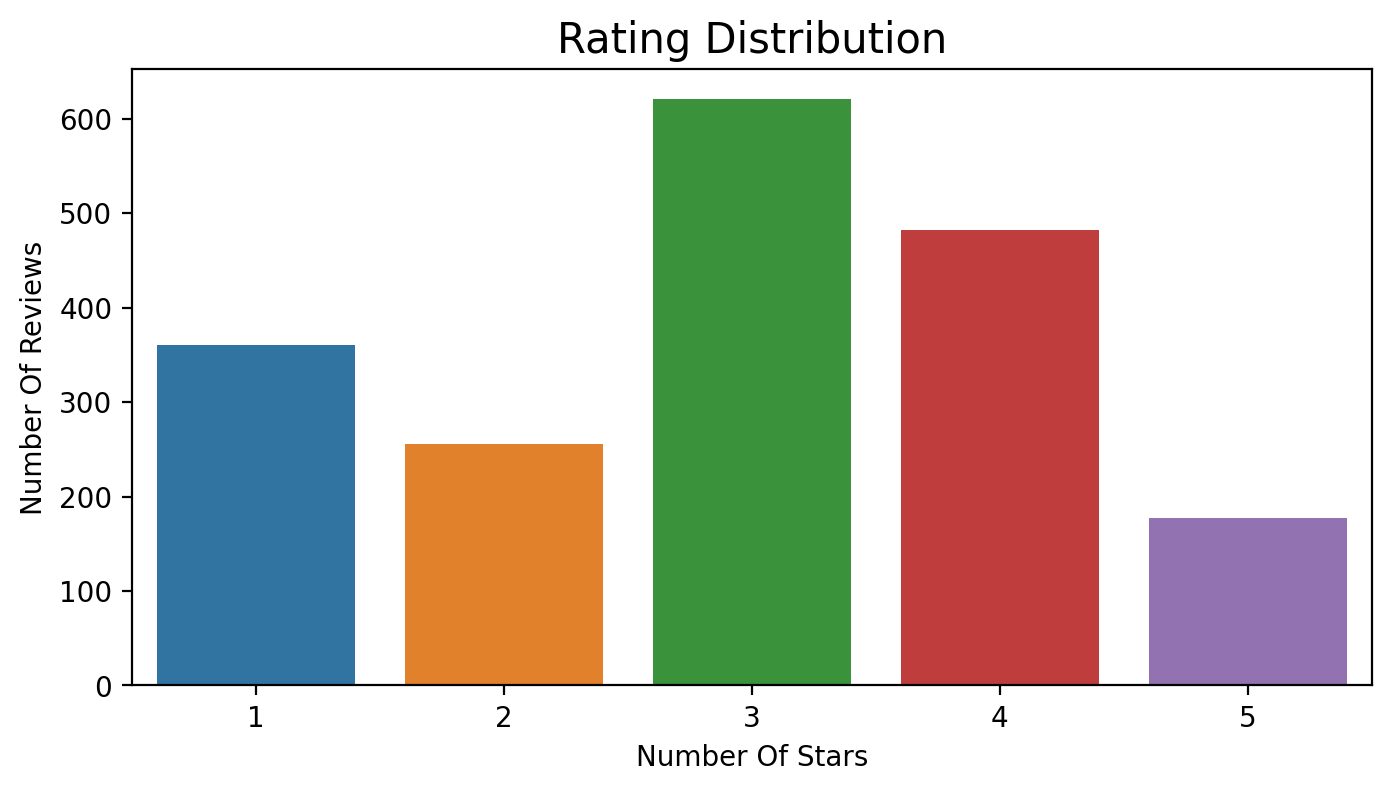

In [30]:
# Seeing rating distributions

plt.figure(figsize=(8,4),dpi=200)
sns.barplot(df.stars.value_counts().sort_values(ascending=True).index,
                 y=df.stars.value_counts().sort_values(ascending=True))

plt.title("Rating Distribution",fontsize=15)
plt.xlabel("Number Of Stars",fontsize=10)
plt.ylabel("Number Of Reviews",fontsize=10)
plt.xticks();

In [31]:
# Adding Sentiment Columns (proses Labeling)

df.loc[df['stars'] == 3, 'sentiment'] = 'neutral' 
df.loc[df['stars'] < 3, 'sentiment'] = 'negative' 
df.loc[df['stars'] > 3, 'sentiment'] = 'positive' 
df = df[["stars","sentiment","review"]]

df.to_csv('data_sentimen.csv', index=False)
df.head(100)

,stars,sentiment,review
0,1,negative,Anda tidak dapat membayar bagasi secara online...
1,1,negative,Biasanya seringkali keterlambatan atau delay t...
2,4,positive,Tidak lagi mengalami delay (4 flight Jkt-Bpn P...
3,4,positive,"""Anda mendapatkan apa yang Anda bayar"" menggam..."
4,1,negative,karena dalam hal jatah bagasi ada perbedaan be...
5,1,negative,saya pernah terbang dengan Lion Air sebelumnya...
6,2,negative,1)Saya terbang dari Balikpapan ke Jakarta pada...
7,1,negative,1. Kursinya keras seperti batu.2. Segala sesua...
8,3,neutral,1. penerbangan dari jakarta pada hari minggu j...
9,1,negative,1. Staf lion air sisi Bali menyuruh kami untuk...


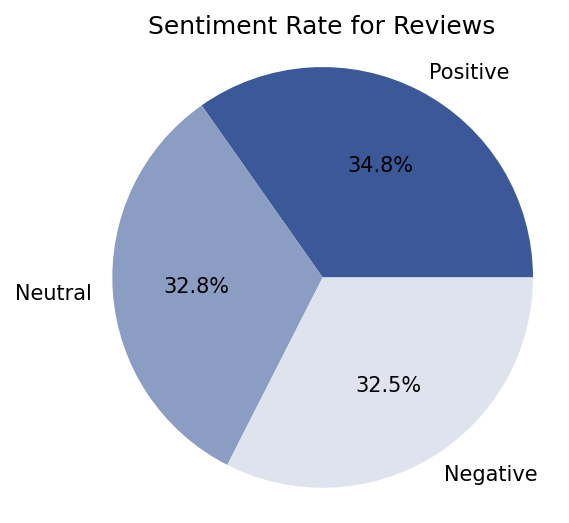

In [32]:
positive = len(df[df["sentiment"]=="positive"])
negative = len(df[df["sentiment"]=="negative"])
neutral = len(df[df["sentiment"]=="neutral"])

pie_sentiment = df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(4,4),dpi=150),
labels = 'Positive','Neutral','Negative'
colors = ['#3B5998', '#8B9DC3','#DFE3EE']
plt.pie(pie_sentiment, colors=colors,labels=labels,autopct='%1.1f%%')
plt.style.use('default')
plt.title('Sentiment Rate for Reviews')
plt.axis('equal')
sizes = [positive, neutral, negative]
plt.show()

In [33]:
# Case folding (lowercase)
data = pd.read_csv('data set.csv', encoding='latin1')
data.head()
import re
def casefolding(review):
    review = review.lower()
    review = re.sub(r'\d+', '', review)
    review = review.translate(str.maketrans("","",string.punctuation))
    review = review.strip('')
    return review
data['review'] = data['review'].apply(casefolding)
data.head(100)
data["review"][0]

' baru sekali naik pesawat ekonomi yang ada tv nya  bisa colok headset sambil nonton video  dengar lagu  keren pokoknya  biasa anak kalau di dalam pesawat tuh rewel ya  tapi waktu naik batik air  anak saya seneng banget bisa nonton kartun  saya juga suka kartun  nonton bersama deh'

In [34]:
#Tokenizing menggunakan NLTK
from nltk.tokenize import word_tokenize

data["review"].dropna(inplace=True)
data["review"] = data["review"].apply(word_tokenize)
data.head(10)

,ï»¿stars,sentiment,review
0,4,positive,"[baru, sekali, naik, pesawat, ekonomi, yang, a..."
1,4,positive,"[anda, mendapatkan, apa, yang, anda, bayar, me..."
2,2,negative,"[saya, terbang, dari, balikpapan, ke, jakarta,..."
3,1,negative,"[kursinya, keras, seperti, batu, segala, sesua..."
4,1,negative,"[staf, lion, air, sisi, bali, menyuruh, kami, ..."
5,4,positive,"[saya, mendapat, penerbangan, murah, dari, ban..."
6,4,positive,"[september, kami, saya, suami, dan, safa, anak..."
7,1,negative,"[x, minta, info, ke, cs, dihari, ya, berbeda, ..."
8,1,negative,"[dari, kami, bepergian, dengan, tas, antara, d..."
9,1,negative,"[kali, naik, lion, tapi, hanya, kali, yang, on..."


In [35]:
data["review"][0]

['baru',
 'sekali',
 'naik',
 'pesawat',
 'ekonomi',
 'yang',
 'ada',
 'tv',
 'nya',
 'bisa',
 'colok',
 'headset',
 'sambil',
 'nonton',
 'video',
 'dengar',
 'lagu',
 'keren',
 'pokoknya',
 'biasa',
 'anak',
 'kalau',
 'di',
 'dalam',
 'pesawat',
 'tuh',
 'rewel',
 'ya',
 'tapi',
 'waktu',
 'naik',
 'batik',
 'air',
 'anak',
 'saya',
 'seneng',
 'banget',
 'bisa',
 'nonton',
 'kartun',
 'saya',
 'juga',
 'suka',
 'kartun',
 'nonton',
 'bersama',
 'deh']

In [36]:
#Filtering
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def stopword_removal(comments):
    filtering = stopwords.words('indonesian','english')
    more_stopword = ['a','ada','adalah','adanya','adapun','pilih','agak','agaknya','agar','akan','akankah','akhir','akhiri','akhirnya','aku','akulah','amat','amatlah','anda','andalah','antar','antara','antaranya','apa','apaan','apabila','apakah','apalagi','apatah','arti','artinya','asal','asalkan','atas','atau','ataukah','ataupun','awal','awalnya','b','bagai','bagaikan','bagaimana','bagaimanakah','bagaimanapun','bagainamakah','bagi','bagian','bahkan','bahwa','bahwasannya','bahwasanya','baik','baiklah','bakal','bakalan','balik','banyak','bapak','baru','bawah','beberapa','begini','beginian','beginikah','beginilah','begitu','begitukah','begitulah','begitupun','bekerja','belakang','belakangan','belum','belumlah','benar','benarkah','benarlah','berada','berakhir','berakhirlah','berakhirnya','berapa','berapakah','berapalah','berapapun','berarti','berawal','berbagai','berdatangan','beri','berikan','berikut','berikutnya','berjumlah','berkali-kali','berkata','berkehendak','berkeinginan','berkenaan','berlainan','berlalu','berlangsung','berlebihan','bermacam','bermacam-macam','bermaksud','bermula','bersama','bersama-sama','bersiap','bersiap-siap','bertanya','bertanya-tanya','berturut','berturut-turut','bertutur','berujar','berupa','besar','betul','betulkah','biasa','biasanya','bila','bilakah','bisa','bisakah','boleh','bolehkah','bolehlah','buat','bukan','bukankah','bukanlah','bukannya','bulan','bung','c','cara','caranya','cukup','cukupkah','cukuplah','cuma','d','dahulu','dalam','dan','dapat','dari','daripada','datang','dekat','demi','demikian','demikianlah','dengan','depan','di','dia','diakhiri','diakhirinya','dialah','diantara','diantaranya','diberi','diberikan','diberikannya','dibuat','dibuatnya','didapat','didatangkan','digunakan','diibaratkan','diibaratkannya','diingat','diingatkan','diinginkan','dijawab','dijelaskan','dijelaskannya','dikarenakan','dikatakan','dikatakannya','dikerjakan','diketahui','diketahuinya','dikira','dilakukan','dilalui','dilihat','dimaksud','dimaksudkan','dimaksudkannya','dimaksudnya','diminta','dimintai','dimisalkan','dimulai','dimulailah','dimulainya','dimungkinkan','dini','dipastikan','diperbuat','diperbuatnya','dipergunakan','diperkirakan','diperlihatkan','diperlukan','diperlukannya','dipersoalkan','dipertanyakan','dipunyai','diri','dirinya','disampaikan','disebut','disebutkan','disebutkannya','disini','disinilah','ditambahkan','ditandaskan','ditanya','ditanyai','ditanyakan','ditegaskan','ditujukan','ditunjuk','ditunjuki','ditunjukkan','ditunjukkannya','ditunjuknya','dituturkan','dituturkannya','diucapkan','diucapkannya','diungkapkan','dong','dua','dulu','e','empat','enak','enggak','enggaknya','entah','entahlah','f','g','guna','gunakan','h','hadap','hai','hal','halo','hallo','hampir','hanya','hanyalah','hari','harus','haruslah','harusnya','helo','hello','hendak','hendaklah','hendaknya','hingga','i','ia','ialah','ibarat','ibaratkan','ibaratnya','ibu','ikut','ingat','ingat-ingat','ingin','inginkah','inginkan','ini','inikah','inilah','itu','itukah','itulah','j','jadi','jadilah','jadinya','jangan','jangankan','janganlah','jauh','jawab','jawaban','jawabnya','jelas','jelaskan','jelaslah','jelasnya','jika','jikalau','juga','jumlah','jumlahnya','justru','k','kadar','kala','kalau','kalaulah','kalaupun','kali','kalian','kami','kamilah','kamu','kamulah','kan','kapan','kapankah','kapanpun','karena','karenanya','kasus','kata','katakan','katakanlah','katanya','ke','keadaan','kebetulan','kecil','kedua','keduanya','keinginan','kelamaan','kelihatan','kelihatannya','kelima','keluar','kembali','kemudian','kemungkinan','kemungkinannya','kena','kenapa','kepada','kepadanya','kerja','kesampaian','keseluruhan','keseluruhannya','keterlaluan','ketika','khusus','khususnya','kini','kinilah','kira','kira-kira','kiranya','kita','kitalah','kok','kurang','l','lagi','lagian','lah','lain','lainnya','laku','lalu','lama','lamanya','langsung','lanjut','lanjutnya','lebih','lewat','lihat','lima','luar','m','macam','maka','makanya','makin','maksud','malah','malahan','mampu','mampukah','mana','manakala','manalagi','masa','masalah','masalahnya','masih','masihkah','masing','masing-masing','masuk','mata','mau','maupun','melainkan','melakukan','melalui','melihat','melihatnya','memang','memastikan','memberi','memberikan','membuat','memerlukan','memihak','meminta','memintakan','memisalkan','memperbuat','mempergunakan','memperkirakan','memperlihatkan','mempersiapkan','mempersoalkan','mempertanyakan','mempunyai','memulai','memungkinkan','menaiki','menambahkan','menandaskan','menanti','menanti-nanti','menantikan','menanya','menanyai','menanyakan','mendapat','mendapatkan','mendatang','mendatangi','mendatangkan','menegaskan','mengakhiri','mengapa','mengatakan','mengatakannya','mengenai','mengerjakan','mengetahui','menggunakan','menghendaki','mengibaratkan','mengibaratkannya','mengingat','mengingatkan','menginginkan','mengira','mengucapkan','mengucapkannya','mengungkapkan','menjadi','menjawab','menjelaskan','menuju','menunjuk','menunjuki','menunjukkan','menunjuknya','menurut','menuturkan','menyampaikan','menyangkut','menyatakan','menyebutkan','menyeluruh','menyiapkan','merasa','mereka','merekalah','merupakan','meski','meskipun','meyakini','meyakinkan','minta','mirip','misal','misalkan','misalnya','mohon','mula','mulai','mulailah','mulanya','mungkin','mungkinkah','n','nah','naik','namun','nanti','nantinya','nya','nyaris','nyata','nyatanya','o','oleh','olehnya','orang','p','pada','padahal','padanya','pak','paling','panjang','pantas','para','pasti','pastilah','penting','pentingnya','per','percuma','perlu','perlukah','perlunya','pernah','persoalan','pertama','pertama-tama','pertanyaan','pertanyakan','pihak','pihaknya','pukul','pula','pun','punya','q','r','rasa','rasanya','rupa','rupanya','s','saat','saatnya','saja','sajalah','salam','saling','sama','sama-sama','sambil','sampai','sampai-sampai','sampaikan','sana','sangat','sangatlah','sangkut','satu','saya','sayalah','se','sebab','sebabnya','sebagai','sebagaimana','sebagainya','sebagian','sebaik','sebaik-baiknya','sebaiknya','sebaliknya','sebanyak','sebegini','sebegitu','sebelum','sebelumnya','sebenarnya','seberapa','sebesar','sebetulnya','sebisanya','sebuah','sebut','sebutlah','sebutnya','secara','secukupnya','sedang','sedangkan','sedemikian','sedikit','sedikitnya','seenaknya','segala','segalanya','segera','seharusnya','sehingga','seingat','sejak','sejauh','sejenak','sejumlah','sekadar','sekadarnya','sekali','sekali-kali','sekalian','sekaligus','sekalipun','sekarang','sekaranglah','sekecil','seketika','sekiranya','sekitar','sekitarnya','sekurang-kurangnya','sekurangnya','sela','selain','selaku','selalu','selama','selama-lamanya','selamanya','selanjutnya','seluruh','seluruhnya','semacam','semakin','semampu','semampunya','semasa','semasih','semata','semata-mata','semaunya','sementara','semisal','semisalnya','sempat','semua','semuanya','semula','sendiri','sendirian','sendirinya','seolah','seolah-olah','seorang','sepanjang','sepantasnya','sepantasnyalah','seperlunya','seperti','sepertinya','sepihak','sering','seringnya','serta','serupa','sesaat','sesama','sesampai','sesegera','sesekali','seseorang','sesuatu','sesuatunya','sesudah','sesudahnya','setelah','setempat','setengah','seterusnya','setiap','setiba','setibanya','setidak-tidaknya','setidaknya','setinggi','seusai','sewaktu','siap','siapa','siapakah','siapapun','sini','sinilah','soal','soalnya','suatu','sudah','sudahkah','sudahlah','supaya','t','tadi','tadinya','tahu','tak','tambah','tambahnya','tampak','tampaknya','tandas','tandasnya','tanpa','tanya','tanyakan','tanyanya','tapi','tegas','tegasnya','telah','tempat','tentang','tentu','tentulah','tentunya','tepat','terakhir','terasa','terbanyak','terdahulu','terdapat','terdiri','terhadap','terhadapnya','teringat','teringat-ingat','terjadi','terjadilah','terjadinya','terkira','terlalu','terlebih','terlihat','termasuk','ternyata','tersampaikan','tersebut','tersebutlah','tertentu','tertuju','terus','terutama','tetap','tetapi','tiap','tiba','tiba-tiba','tidak','tidakkah','tidaklah','tiga','toh','tuju','tunjuk','turut','tutur','tuturnya','u','ucap','ucapnya','ujar','ujarnya','umumnya','ungkap','ungkapnya','untuk','usah','usai','v','w','waduh','wah','wahai','waktunya','walau','walaupun','wong','x','y','yg','jg','dgn','dng','kalinya','sy','bgst','atidak','hehe','dr','gw','ga','lionair','aja','sj','tsb','batik','jam','klo','pp','dng','lion','air','saya','anda','pesawat','sbg','dg','ya','yaitu','yakin','yakni','yang','z']
    filtering.extend(more_stopword)
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, comments)
    for x in fit:
        data.append(x)
    return data
data['review'] = data['review'].apply(stopword_removal)
data["review"][0]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khaerunnizar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['ekonomi',
 'tv',
 'colok',
 'headset',
 'nonton',
 'video',
 'dengar',
 'lagu',
 'keren',
 'pokoknya',
 'anak',
 'tuh',
 'rewel',
 'anak',
 'seneng',
 'banget',
 'nonton',
 'kartun',
 'suka',
 'kartun',
 'nonton',
 'deh']

In [37]:
#proses Stemming (mengubah menjadi kata dasar)

from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(comments):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in comments:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
data['review'] = data['review'].apply(stemming)

data.to_csv('data_clean.csv', index=False)
data_clean = pd.read_csv('data_clean.csv', encoding='latin1')
data_clean.head()

ekonomi tv colok headset nonton video dengar lagu keren pokok anak tuh rewel anak neng banget nonton kartun suka kartun nonton deh
bayar gambar maskapai harap milik layan penuh terbang mulus terbang tempat kursi belah pintu darurat untung fa ganti terbang periksa latar biar duduk belah pintu darurat
terbang balikpapan jakarta selasa maret check in balikpapan bagasi pindah jakarta terbang kl staf konter
kursi keras batu headphone hibur selimut bantal biaya bayar sektor del kl
staf sisi bal suruh turun capai makassar sampa makassar pramugari suruh turun check in srsly turun pramugari pilot foto kokpit umum terbang pilot potret tumpang turun bus antri tiket scan bag cari gerbang gerbang bentrok tunjuk bus jakarta manado tumpang bingung salah bus delay terbang bal delay makassar tumpang hilang alam keri manajemen sop
terbang murah bangkok dmk phuket hkt bath layak mudah checkin lanjut situs web aplikasi online tiket cetak tunjuk tiket online tugas imigrasi lepas landas terbang darat pramug

cerita dapat murah pasar pilih milik pilih jadwal milik terbang tuju hari buruk terbang penuh batal gabung terbang kursi duduk kosong bus hatihati terkadang barang bawa rusak bayar bungkus bagasi percaya
keluh maskapai alam terbang terbang pagi check in cepat antri pendek klaim bagasi bandara juanda puas
pilih maskapai terbang flesksibel pilih dadak
pungli bandara terminl orang penting uang uang apalgi tugas check innya jelek prlayanan muka bershabat ramah jutek dn kasar smuanya jadi uang akak lgi pkai maskapai so bad nnti perushaan penerbngan bngkrut pelayann orang
testimoni ttg negative utk alam agustus agustus libur bal pakai blm kecewa delayedpelayanan puas jadi bandara ngurah rai koper anak pecah komplain tugas airtidak sampe menit selesai terima uang ganti rugi proses sulit sulit dapat lagu untung bbrp sepupu bal kunjung jakarta utk tugas kantor jemput soekarno hatta sepupu pakai delayedso far puas kondisi kursi benah peremajaandiperbarui terima kasih
bilang delay sekian delay se

jalan gerbang wings umum delay menit balik cangkir kopi pergi ruang tunggu menit jadwal ulang temu terbang lepas landas maskapai benarbenar tanggung seringkali delay batal terbang ingat alas pindah terminal jakarta cetak ubah tiket email jenis ingat cari tipu tumpang staf darat maskapai sopan peduli heran langgan marah maskapai terbang buruk dunia pilih maskapai dasar harga terima konsekuensi putus
berkalikali terbang delay tugas hilang delay bagasi suka bongkar
sedia bayar idr lebih bagasi kg visa prabayar anggota staf konter checkin terbang sayang pramuniaga konter salah rumah harap anomali cepat selesai hubung nomor layan langgan tolak ganti juang selesai alamat email layan langgan membuangbuang energi pesan singkat lancong layan udara buruk dekade ramai profesional ventilasi buruk lepas landas benarbenar keri
bersih rapi peswat pesawat bersih harga jangkau lcd hibur include snack
bersih roti murah murah flight attendant ramah proses booking dst mudah pesan traveloka alesan bisnis c

delay paham cuaca buruk tumpang boarding
delay terbang surabaya semarang kejut
delay substansial kompensasi nol minum tawar delay gumpal aneh tisu dorong ventilasi udara panas layan langgan buruk
delay singkat late not flying at allpenerbangan lepas landas delay minta maaf senyum empati makan sedingin roti kue keraspelayanan tumpang main ponsel pramugari apaapa hebat ruang bandara parkir pintu terminal jalan bus pagisetelah tunggu tumpang jalan jalan buang sampah bau harum
delay tanggung snack kecewa lambat
delay delay delay terbang batam kotakota indonesia jambi harap delay
delay bawa lambat layan ok makan ok entertainment ok
usaha hasil ekstra jalan singkat phuket pulaupulau kenal beli tiket terbang pagi bandara don muang phuket jalan hari komprehensif phi phi pulaupulau usaha tur beli paket baik bawa usd terbang didelay bersamasama capai phuket lewat jalan lewat paket tur phi phi taksi dermaga bayar biaya penuh bayar feri pulau phi phi biaya tambah terbang delay kejar terbang pagi a

terbang sl don muang trang delay umum tunda tamu duduk tunggu informasi tunggu dengar panggil staf pergi rencana informasi apa delay terbang cari jadwal donmueng online suka maskapai tingkat layan terima kasih
tinggal dengar umum panggil ruang tunggu sadar tangan terbang lepas landas dekat layan langgan kejut lepas landas nama umum takimg off saran pergi kantor tangga temu tugas lupa nama ubah jadwal bayar heran beli maskapai jujur minimal jarang lambat rekomendasi jalur udara terbang terima kasih
terbang bandara gusti ngurah rai denpasar surabaya jt males maskapai buruk terbang tp krn flight malam surabaya paksa ambil kecewa flight delay menit pemberitahuan kabin suasana panas ac nyala oke sabar take off nyala and im wrong terbang ac nyala angin info pramugari bilang maaf info pilot tunggu ac kunjung nyala gerah panas lepek info pramugari wow amazing flight buruk depan butuh customer dps bal panas kopaja desak
terbang singapore jakarta maskapai maskapai on time banget layan ramah menu

sekian thanks god ngalamin delay on time trip inirezeki sempet was was berita super delay
mengunakan terbang pulang bal jakarta minggu harga lumayan mahal harga mahal terbang minggu mana orangorang jakarta libur terbang makan snack roti putih tvscreen layar tumpang fungsi rusak terbang sengaja mengfungsikan layarlayar kursi tumpang harga garuda bagan baik kerja fasilitas baik tingkat layan tara terbang garuda
alam kecewa maskapai group dengan terbang on time tv modal earphone snack isi roti mineral terbang hibur film terbang singkatsehingga menyelesaikannyapadahal pilih film variatif
alam maskapai proses check in cepat tumpang tugas check in ramah boarding cepat terbang berangkat tumpang sepi teman pindah duduk pintu darurat ruang kaki luas hibur pesawat oke untung bawa headset nikmat hibur gratis bawa beli terbang inflight meal roti terbang singkat bersih layan terbang oh iya pakai pramugari unik kebaya cantik hehehe
alam berangkat batam jakarta maskapai class economy harga tiket luma

berhatihati ambil terbang jalan perahu harga mahal terbang mudah lepas landas darat harga bagus terbang
jalan minggu libat sembilan terbang asia tenggara tagih tiket tas emas ulang konter alam sedih turun biaya kilo bayar online murah agregator terbang takut pilot tinggal darat bangkok turun dekat batal daki alam informasi pikir keras terbang maskapai
barubaru salah mes terbang pulang pergi lombok bal terbang keluar terbang asli masuk terbang email malam kejut bandara temu terbang asli jadwal terbang terbang bayar lebih bagasi izin bayar kartu milik uang kembali bayar uang tunai laku diberitahu terbang tinggal barangbarang indonesia darat darat aman alami rekomendasi buat ringan
barubaru ambil terbang jakarta yogyakarta jakarta terbang benarbenar lambat berangkat terbang yogya lambat puji titik kotak ayam goreng maskapai gratis wanita ruang tunggu lambat murah harga timbang maskapai
pergi singapura bal jakarta checkin tolak milik bukti terbang tinggal bal rencana panjang visa bulan tep

ambil transfer domestik thailand phuket bangkok makan menit cari opsi murah maskapai terbang harga tawar maskapai delay terbang lepas landas darat wifi nok sedia fasilitas duduk nyaman adil kaki sulit duduk staf lempar barang bawa terbang tag rapuh bagasi bantu benarbenar lempar bentur barang bawa milik harga rusak harap bawa bagasi kabin ps jatah bagasi gratis kg bagasi daftar tambah bagasi kabin boleh
maskapai terbang domestik salah harga bagasi kl gratis makan ringan gratis terbang kru efisien bersih mesan mudah online guna
konfirmasi terbang november pagi batam jakarta november jogja batam muas november terbang pagi delay informasi pesan muncul layar ponsel kakak tuju konter terima informasi periksa kondisi harap tim maskapai tim maskapai umum delay terbang november delay menit tampil layar tv situasi tidur ac fungsi buruk situasi flu batuk tinggal tambah sebab nyaman tumpang pramugari ac fungsi jawab minta maaf ac baikbaik terbang darat kece terbang ubah terbang memberitahukan ala

maskapai terbang murah embelembel reputasi lambat outbound inbound staf checkin ramah minta duduk belah pintu darurat kaki hormat keluh biaya rendah mil
aduhsaya garuda jadwal terbang sesuai alternatif delay macet bandara bandung laku aspek jalan
lelucon mitra sayang ambil terbang rentang rusak jalan habis bandara kacau lombok bal delay titik henti tumpang bal jakarta batal terbang ubah terbang terbang didelay menit batal delay tinggal terbang lanjut jakarta lionpura lelucon jakarta pandu terminal tinggal terbang staf layan langgan area datang hubung kirim jalan ambil antarjemput terminal telepon terbang jakarta lionpura milik alir kamar mandi cuci tangan beli sedot hindar
maskapai ekonomi embelembel pergi siap ubah gat menit delay berangkat sempat ubah gerbang menit terbang terbang lancar kupang benarbenar senang sayang layan konsultasi informasi langgan terampil moga iring tumpang lambat menit dalam delay
maskapai terbang biaya rendah bagasi checkin gratis ruang kaki makan minum tawa

batal terbang maret kembali uang hubung usaha kartu kredit balik transaksi maskapai terbang benarbenar malu wewenang penuh curi langgan timbang
salah usaha terbang besar indonesia jangkau tuju indonesia lokasi pencil sayap udara usaha grup layan milik jadwal pilih jadwal sedia tiket murah banding maskapai citra ideal pilih maskapai putus pribadi maskapai pilih tamu perhati harga tiket perhati jalan operasional layan barubaru layan jalan singkat semarang pilih lambat situasi hadap maskapai dasar alam lambat umum berangkat boarding tera boarding pass durasi delay menit menit tugas darat tumpang proses bongkar muat jadi awak kabin diri pintu gerbang sambut tumpang tamu tunggu menit dorong lepas landas situasi parah darat kapten operasi ac ac operasi lepas landas maskapai strategi masingmasing minimal guna bahan bakar korban nyaman tumpang manajemen bayi anak naik suhu nyaman menang perintah indonesia milik atur kuat tanggung maskapai terbang pm permen praktik patuh atur layan alas cakup a

maskapai raja ngaret delay bagasi rusak layan buruk dengar berita management pilot konsumsi narkotika harga murah kapok terbangbdengan maskapai
maskapai besar kunjung bagus jalan bisnis senang murah bagasi tiket biaya rendah bagus
maskapai buruk makan buruk hibur alam keri sektor terbang film kursi kotor sampah manamana duduk kram makan buruk lihatpernah
maskapai back up airasia full book harga maskapai mahal fasilitas minim late is our nation maskapai hadir on time performance rendah butuh otp milik terbang lanjut maskapai
maskapai tawar harga murah manajemen lambat bagus keluh tawar harga murah bagasi
maskapai keri tunda delay delay alas operasional delay delay layan coba gratis
maskapai keri hindar layan buruk kacau ambil barang bawa gerbang berat banyak bagasi tumpang airasia jalan hindar terbang kejut aman
maskapai keri layan buruk jelas delay terbang ubah maskapai lusuh duduk tua bersih derak toilet bau staf tibatiba penuh perhati minum kontak awak kabin terbang senang senang
mas

coba tagih usd bagasi checkin berat kg terbang internasional terbang harga usd sedia bayar turun rp juta usd timbang buang tas pakai biaya tutup harga barangbarang tibatiba  happy hour muncul harga turun usd hilang katakata
tawar bagasi mesan terbang pergi checkin tas hasil uang kena biaya pisah profesional penuh sikap jijik manajer tip kapal milik malu kru senang darat bus sedia bawa tumpang ruang tunggu berangkat jalan tunggu menit frustrasi konyol tas rusak lempar lempar sila thai airways asia kursi terbang sl milik pita jendela takut aman terbang tolong
kenal terbang delay terbang berangkat sungguh baik service apresiasi
group milik manajemen beda layan bagus imbang garuda harga jangkau pramugari ramah custom kebaya khas indonesia puas
maskapai murah layan buruk terbang milik ruang kaki abai beli botol terbang pramugari kasar bahasa inggris layan sedih
maskapai terbang biaya rendah rute sedia layar pribadi film program hibur dalam saji makan ringan gratis
group group moga tepat ter

tgl agustus terbang banjarmasin jt jadwal leberangkatan wib mundur terbang kaget alias biasa alami delay alami apresiasi harga crew tugas duduk pramugari tawar utk pindah bangku no baris mati hp sadar hp satu tinggal ruang tunggu perhati jeli pramugari barang tertinggalmungkin gelisah panik hp tinggal ruang tunggu sigap pramugari tugas ground handling tutup pintu tumpang hp tinggal ruang tunggu tugas ground handling nama mas haris sdh berangkat nomer hp utk simpan ecek hp saya ruang tunggu puji tuhan banjar hubung hp terima mas haris hp aman malam banjarmasin temu mas haris hp terima kondisi apa rencana uang apresiasi mas haris terima sedkit paksa ikhlas tanggung kerja salut pramugari peduli perhati kondisi tumpang sigap tulus mas haris tugas groun handling
tgl nopember jt pkl diberitahu via sms terbang tiada pindah jt pkl ok no problem you have business am not pkl check in every thing was ok boarding pass tera boarding time pkl tandatanda boarding pkl umum due to operational reason jt

terbang delay checkin online terbang lanjut pramugari hubung china tumpang nomor telepon china cari google milik telepon untung mes kiwi alih terbang lewat terbang transit berkat terima minta maaf kursi sempit dingin nyaman
terbang delay puluh menit info mati papan info berangkat staf angkat bahu tinggal terbang asia bal perth bayar rp terbang pagi hilang tugas kursi prabayar makan minum terbang jepit kursi sampah asuransi asia membuangbuang uang mes hotel ketidaknyamanan biaya konsekuensi nihil nol nada coba jelas tulis asuransi jalan formulir artikel hilang isi kirim jakarta lucu aplikasi ponsel pintar keluh bentuk kertas sesuai juluk delaydelaydelay maskapai
terbang jurus cgkdtb senang jadwal ontime jalan senang makan banding si biru satu
terbang alam terbang image jelek molor moga tepat tular grup
terbang senang samping layan ramah media hibur makan enakrecommendedwalau jujur harga mahal worth it banget
terbang beda maskapai terbang group ramah pramugari tepat fasilitas hibur
terba

terbang batal usaha sms email
terbang pagi darat solo an umum pesawatdelay tunggu terbang bagi kotak snack isi mineral bungkus biskuit tumpang kesan buruk 
terbang sore harap delay akumulasi delay jadwal terbang checkin kacau bandara batam hasil pikul pikir drum rolls ta dum ta dum terbang umum delay operasi teknis harap delay umum bwahaha delay tebak ekor anjing milik hari
terbang tanggal kesan take off darat hlp menit jadwal terimakasih kapten erti rindu rumah
terbang tanggal des lombok senang harga jangkau budget layan terbang lombok nyaman ramah crew pilih terbang
terbang biaya murah plus snack pesawat pakai banding saudara tambah biaya mendpatkan nyaman tepat terbang
terbang pekan wib berangkat sayang loading bagasi tunggu menit sesuai
terbang jadwal boarding boarding lampau informasi berangkat undur alas operasional alihalih berangkat sesuai jadwal baru paksa tunggu pemberitahuan panggil boarding malam mie goreng mineral kemas gelas tani habis ruang tunggu berangkat
terbang jauh 

jalan mudah fasilitas unggul jamin nyaman saat pergi besama teman keluarga
jalan jogjapadang wib lambat cuaca hujan
jalan kupang jakarta manja hibur dlam makan minum pilih belanja katalog oleholeh
jalan manokwari bandara soekarno hatta jakarta terbang non stop nyaman
jalan rute palu makassar senang layan awak darat awak kabin ramah terbang rekomendasi salah pilih terbang jalan terbang
jalan maskapai nyaman harga sesuai dompet harga tiket sahabat maskapai kenal delaynya langgan amuk pilih terbang
jalan bagi terbang milik lebih bagasi kena biaya terbang duduk pintu darurat untung baca buruk alam
jalan balikpapan maskapai cengkareng layan muas on time terbang makan darat mulus inflight entertainment
jalan jakarta yogyakarta tanggal juli jadwal wib diberitahukan kondisi delay delay tumpang panggil kompensasi apa terang apa tugas tumpang panggil wib berangkat mesin nyala crew lintas padat berangkat jakarta
jalan surbaya berangkat ontime nyaman take off landing soft minim bentur hentakan
jal

delay parah indonesia raya tdk tanggung kompensasi utk lambat hanpir tdk sesuai atur perintah sdh alami delay parah
ruang kaki lega makan pilih nasi nasi menu daging opsi vegetarian tawar kopi teh kopi suruh tunggu refill tunggu kunjung pas ktnya ud prepare landing bagi
groups bagus jalur timur jalur barat buruk jogja bus lengkap layan bagus hospitality rekomendasi
bersih pramugari helpful terbang murah tumpang kotak isi roti mineral sedia pilih tonton musik film game ruang kaki luas nikmat maskapai
duduk luas hibur filmfilm musik dll bagus makan dar minum snack dar harga mahal banding makan minum kurang variasi
on time layan kabin tumpang penuh bagasi bawa darat ngtidak nyaman
pilot muda alam msh kecewa terbang jakarta tara sdh dpt boarding pass lengkap transit mnt balikpapan tumpang suruh turun terminal balikpapan banget sdh lari ruang tunggu berangkat eh sdh panggil kursi trus fungsi turun
pesawat bagus layan ramah on time senang harga tiket jangkau
pesawat bagus pramugari ramah ber

kecewa airpagi sms terbang cancel aju canceldan terbang sore kendalasaya rugi iniwaktu libur buang siatolong maskapai feedback inikarena tipu
buruk angkut mikroletkotor udara kanbin segarkursi jelekapalagi jalan duduk kayukrn jelek
terbang maskapai airjarak duduk dpn belakang luas nyaman snack nonton film main game pokok terbang keren deh tp kl saranharganya dimurahin yaaa
kecewa maskapai berangkat sesuain jadwal trtera tiket pemberngkatan cek in seblum berangkattrtapi maskapai bilang krna beragkat jelas dana ganti hnya adill salah tumpang nak imbas pemberngkatan gagal uang sesuai harga awalastagfirullah tolong disiplin perhati jagn tnpa pikir nasip tumpang berkah tolong nasip tumpang perhati
mahal terbang maskapai peringkat aman buruk harga curam bagasi diskon lengkap selam mahal terbang
muas harga jangkau layan ramah sopan perhati costumer berangkat
senang terbang belakang persis jessica iskandar anak hehehe its lucky me
senang jalan hibur mineral pilih teh kopi roti daging cake buah

terbang pilih hitung tangan terbang lepas landas sisi tinggal terbang monitor berangkat sesuai jadwal gerbang tentu pikir dengar solo pergi agen gerbang solo laku tiket terbang erti maskapai terbang murah sulit layan langgan
dengar halhal buruk terbang negeri indonesia milik reputasi buruk cerdik delay staf kasar mitra jalan pulang pergi bal jakarta usaha jalan saran penuh jadwal anggar putus ambil sempat terbang internasional atur grup malindo baikbaik terbang jakarta lambat menit terbang utama terbang pesan siap dorong dorong seolaholah juang pasar lokal periode puncak siap ambil tangga labuh gerbang terminal izin tumpang kelas bisnis kelas ternak muat pintu terbang jakarta ruang kursi ruang kaki belah indonesia lebih berat badan muat kursi jaga paha tutup terusmenerus ruang kaki condong kanan ambil ruang mitra sempit untung terbang lumayanpenerbangan jakarta bal milik ruang kaki untung milik baris ruang hilang rebah kursi terbang alam keduanyakami milik kg bagasi masingmasing terban

ambil terbang tanggal mei alam terbang ambil cgksin
kejar flight pagi yogyakarta balikpapan urus kerja maskapai sedia flight murah flight terbang telat
gendong bayi jarak jakarta denpasar terbang takut dengar berita buruk terbang reputasi buruk kenal orangbaik senang konter check in tugas ramah membantulalu pramugari layan perhati copilot pramugari lakilaki sambut ramah sopan bal benarbenar pisah jalan buruk take off landingnya mulus duduk lebar nyaman tumpang gendong bayi dapat pergi dengan alam alami
maskapai alternatif rekomendasi ambil yah asia berangkat celaka salah maskapai kenal indonesia garuda ada promo citilink anak usaha garuda bagus
airbus terbang jakarta terbang benarbenar senang baris milik tv mana tani jalan roti minum tumpang they are cool
jalan pulang libur yogyakarta jakarta so far terbang oke delay pramugari ramah beda notabanenya induk usaha
nyaman terbang delay senang
maskapai jalan indonesia terbang delay sebab tinggal terbang lanjut terbang pramugari makan malam 

pergi maskapai dunia buruk layan langgan buruk
keliling indonesia bulan milik terbang internal operator beda indonesia maskapai group buruk terbang grup alami delay staf alas staf arah gerbang salah gagal baru pemberitahuan layar bandara gerbang salah umum tanoy tinggal terbang anggota staf arah gerbang mes terbang grup batal wilayah tuju pergi pusat panggil konfirmasi batal tiket laku diberitahu kirim email rincian operator tunggu telepon kumpul detail kirim email makan menit operator tibatiba tutup telepon misterius batal coba pikir bayar terbang maskapai andal mis milik situasi garuda batal kembali uang terbang bicara
jalan keliling dunia maskapai beda hadap situasi beda jujur kata salah maskapai terbang buruk dunia
baca komentar negatif maskapai ragu terbang terbang thai udon thani bangkok senang
baca ulas negatif mes terbang terbang jalan hari bal surabaya leg lepas landas hambat terbang alami delay terbang delay makan tumpang ketidaknyamanan maaf lampau lampau rekomendasi maskapa

pergi rute jakarta lionpura cari maskapai ekonomis keluar pribadi coba pilih rute harga maskapai murah bagasi biaya sembunyi navigasi mesan online turun terminal proses imigrasi bea cukai jakarta tangan terbang banding moga ubah
duduk asli indonesia malu maskapai operasi negara aib bangsa kritik hitung hitung banyak biasa lambat ambil tindak pilih sedia sesuai jadwal kecewa benarbenar alas ban bayar maskapai layan harga jangkau harap perintah indonesia ambil tindak disiplin maskapai henti gagal
terbang lowbat budget kunjung makassar solo rekomendasi terbang murah
pilot lompat pulang as thailand perhati maskapai operasi ganggu jengkel terusmenerus operator diskon as asia kejut terbang boeing airbus langka asia pandang pilot teknik suka boeing pribadi pilih kes ganggu harga congkel maskapai diskon kursi buruk kosong checkin online bayar kursi layak komputer program tipu
terbang lambat malam terbang rumah maklum molor mantap dengar umum delay rute maskapai rute delay transit kl lelah hara

delay maskapai satu on time take off bikin mual landing kasar
delay ubah berangkat pemberitahuan didelay wakil maskapai area berangkat temu wakil maskapai terjadikapan terbang berangkatmengapa didelay maskapai langgan antre boarding menit umum tinggal zaman deret kursi kemas dekat satusatunya maskapai terbang alami jejer dekat vueling terbang lin barcelona terbang maskapai pilih harga uang terbang maskapai milik terbang lanjut google delay terbang maskapai milik sejarah kualitas buruk delay ekstrem harfiah satusatunya maskapai ikut batas barang bawa pergi bawa tas berat izin
suka tukar terbang lambat suka sebel kalo murah harga tiket bautidak wangi mentang harga tiket murahfasilitas ruang cantikin dikit
bertahuntahun harap tingkat layan baik terbang delay layan langgan keri tempat tanggung meja kerja personel kabar buruk apaapa milik maskapai terbang murah terbang guna hemat pekan terbang malam milik habis lions peduli peduli dapat hasil
checkin diberitahu bayar ekstra barang bawa mili

staf kasar tampung bagasi checkin tas tangan paksa checkin tas bawa kunci kursi lorong bilang penuh sisa baris kursi kosong lorong laku dendam ambil
staf ramah milik mau bantu bandara krabi muka checkin menit berangkat staf konter checkin jelas bantu jadwal ulang terbang jawab staf milik jalan beli tiket jelas apa beli tiket bangkok
staff kabin susah senyum layan buruk putih kasih boeing er dibanggain apa nyaman ngtidak jarak kaki sempit kalo orgnya siksa banget untung conecting flight banget
suami jenis transportasi jelek kualitas layan oke segi harga murah kualitas suami berangkat bisnis last call pagi dy menit cek in online tiket jual trus oh my god delay tanggung tanggung posisi bandara pintar jm komplain tumpang masuk bus bus ajak keliling area parkir sampe me ready pesawat desak paksa masuk dalam bus siksa mana diri dalam bus nyaman tunggu lounge bandara bayar mahal prefer
maskapai makassar surabaya ampun delaynya alhamdulillah cenderung lombok surabaya pilih jam harga mepetmepet

delay check in diberitahu terbang didelay alternatif terkadang terbang checkin staf terkadang baikbaik latih murah satusatunya untung
lambat menit umum solo delay total tambah acau malam rencana kemudi amed malam bayar ekstra pergi maskapai kelola andal harga
lambat mnt in flight entertainment hilang roti isi ayam layan cabin crew ok ramah take off landing smooth jarak seat ok mudah pilih seat sayang flight tdk utk terbang return
lambat delay informasi tumpang tampil senang kasar boarding runner bandara bal ruang ruang kaki nila uang karier biaya rendah
lambat take off kota tuju hover menit landing landing lambat menit perintah menara bandara pilot umum speaker on time atas kota tuju perintah berputarputar menara bandara tumpang timpa salah delay maskapai kualitas jelas bicara pilot speaker rendah cepat bicara
lepas buruk dengar maskapai terbang indonesia milik terbang usaha mitra baltik alam bagus terbang lepas landas menit ramah hapus bagasi bagus
harga promo long weekend holiday ter

terbang sahabat layan harga kompetitif layan kualitas baik
bandara lombok praya ambil bagasi koper muncul temu tugas hilang tugas merespon ancam kabar ada koper lapor wajib malam kabar koper ketemu dianteranter hotel kunci gembok koper protol hari ganti baju gara gara koper hilang
group kualitas beda layan telat delay terbang layan layar interaktif wisatawan tonton film dengar musik terbang bawa earphone
harga murah maskapai full service layan crew hidang terbang ife otp dekat maskapai full service muas
terbang delay menit layan crew kejut baikbaik lanjut baik
grup relatif on time sayang padat bandara soekarno hatta pagi padat gate runway antri butuh layan pramugari makan lumayan
bus serius terbang benah
woowwww delay bagus bagus murah pergi bantu hemat uang suka atur bantu tumpang bagasi kabin
wow utara si biru bersih kursi balut jok kulit kes bersih layar sentuh tv responsif pramugari ramah harga murah kurang film anakanak update
alam delay makan delay jam tingkat atur sukses
maskapa

,Ã¯Â»Â¿stars,sentiment,review
0,4,positive,ekonomi tv colok headset nonton video dengar l...
1,4,positive,bayar gambar maskapai harap milik layan penuh ...
2,2,negative,terbang balikpapan jakarta selasa maret check ...
3,1,negative,kursi keras batu headphone hibur selimut banta...
4,1,negative,staf sisi bal suruh turun capai makassar sampa...


In [38]:
data["review"][0]

'ekonomi tv colok headset nonton video dengar lagu keren pokok anak tuh rewel anak neng banget nonton kartun suka kartun nonton deh'

In [39]:
data_clean = data_clean.astype({'sentiment' : 'category'})
data_clean = data_clean.astype({'review' : 'string'})
data_clean.dtypes

Ã¯Â»Â¿stars       int64
sentiment      category
review           string
dtype: object

In [40]:
#proses TF-IDF (pembobotan)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['review'].astype('U'))
text_tf

<1275x4606 sparse matrix of type '<class 'numpy.float64'>'
	with 30155 stored elements in Compressed Sparse Row format>

In [41]:
#spliting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean['sentiment'], test_size=0.4, random_state=42)

In [42]:
#performa algoritma Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:" , accuracy_score(y_test,predicted))
print("MultinomialNB Precision:" , precision_score(y_test,predicted,average="weighted", pos_label="NEGATIF"))
print("MultinomialNB Recall:" , recall_score(y_test,predicted,average="weighted", pos_label="NEGATIF"))
print("MultinomialNB f1_score:" , f1_score(y_test,predicted,average="weighted", pos_label="NEGATIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

MultinomialNB Accuracy: 0.8490196078431372
MultinomialNB Precision: 0.8513605700678204
MultinomialNB Recall: 0.8490196078431372
MultinomialNB f1_score: 0.8492470343789728
confusion matrix:
 [[205  30]
 [ 47 228]]

              precision    recall  f1-score   support

    negative       0.81      0.87      0.84       235
    positive       0.88      0.83      0.86       275

    accuracy                           0.85       510
   macro avg       0.85      0.85      0.85       510
weighted avg       0.85      0.85      0.85       510



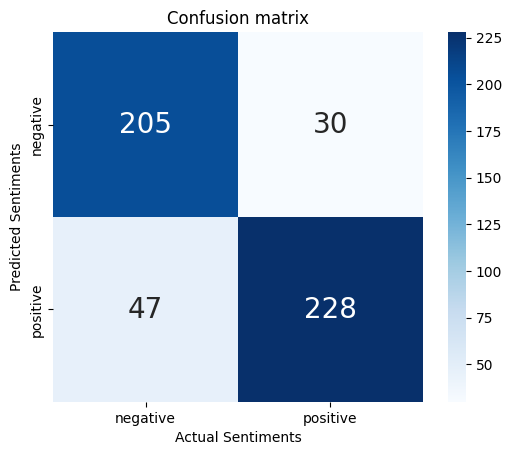

In [43]:
confusion = confusion_matrix(y_test, predicted)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Actual Sentiments')
plt.ylabel('Predicted Sentiments')
plt.show()

In [44]:
#spliting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean['sentiment'], test_size=0.3, random_state=42)

In [45]:
#performa algoritma Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:" , accuracy_score(y_test,predicted))
print("MultinomialNB Precision:" , precision_score(y_test,predicted,average="weighted", pos_label="NEGATIF"))
print("MultinomialNB Recall:" , recall_score(y_test,predicted,average="weighted", pos_label="NEGATIF"))
print("MultinomialNB f1_score:" , f1_score(y_test,predicted,average="weighted", pos_label="NEGATIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

MultinomialNB Accuracy: 0.8302872062663186
MultinomialNB Precision: 0.8305565009712748
MultinomialNB Recall: 0.8302872062663186
MultinomialNB f1_score: 0.8303708355200389
confusion matrix:
 [[147  31]
 [ 34 171]]

              precision    recall  f1-score   support

    negative       0.81      0.83      0.82       178
    positive       0.85      0.83      0.84       205

    accuracy                           0.83       383
   macro avg       0.83      0.83      0.83       383
weighted avg       0.83      0.83      0.83       383



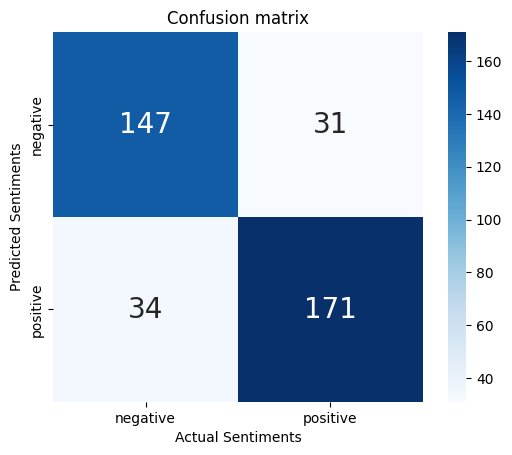

In [46]:
confusion = confusion_matrix(y_test, predicted)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Actual Sentiments')
plt.ylabel('Predicted Sentiments')
plt.show()

In [47]:
#spliting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean['sentiment'], test_size=0.2, random_state=42)

In [48]:
#performa algoritma Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:" , accuracy_score(y_test,predicted))
print("MultinomialNB Precision:" , precision_score(y_test,predicted,average="weighted", pos_label="NEGATIF"))
print("MultinomialNB Recall:" , recall_score(y_test,predicted,average="weighted", pos_label="NEGATIF"))
print("MultinomialNB f1_score:" , f1_score(y_test,predicted,average="weighted", pos_label="NEGATIF"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

MultinomialNB Accuracy: 0.8352941176470589
MultinomialNB Precision: 0.8356740957252465
MultinomialNB Recall: 0.8352941176470589
MultinomialNB f1_score: 0.8354324484553058
confusion matrix:
 [[ 93  20]
 [ 22 120]]

              precision    recall  f1-score   support

    negative       0.81      0.82      0.82       113
    positive       0.86      0.85      0.85       142

    accuracy                           0.84       255
   macro avg       0.83      0.83      0.83       255
weighted avg       0.84      0.84      0.84       255



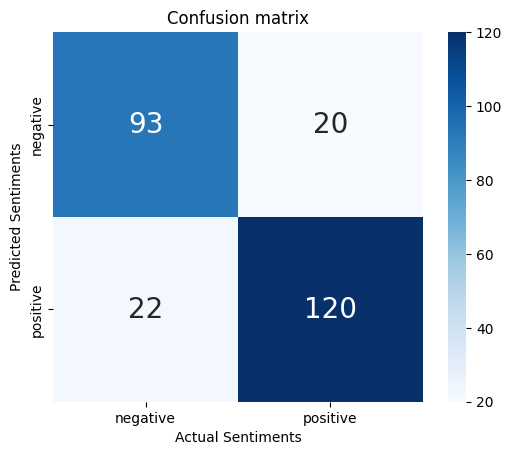

In [49]:
confusion = confusion_matrix(y_test, predicted)
plt.figure(dpi=100)
sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'],
            fmt='d', annot_kws={'fontsize':20})
plt.xticks(rotation=0)
plt.title('Confusion matrix')
plt.xlabel('Actual Sentiments')
plt.ylabel('Predicted Sentiments')
plt.show()

In [50]:
#proses TF-IDF (pembobotan)
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

tvec = CountVectorizer()
X_cVec = tvec.fit_transform(data_clean['review'].astype('U'))
print(X_cVec)
h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(X_cVec)
print(x_tfidf)
X = data_clean.review
Y = data_clean.sentiment

  (0, 1147)	1
  (0, 4390)	1
  (0, 803)	1
  (0, 1492)	1
  (0, 2851)	3
  (0, 4478)	1
  (0, 956)	1
  (0, 2195)	1
  (0, 1996)	1
  (0, 3231)	1
  (0, 160)	2
  (0, 4358)	1
  (0, 3477)	1
  (0, 2790)	1
  (0, 357)	1
  (0, 1901)	2
  (0, 3988)	1
  (0, 925)	1
  (1, 420)	1
  (1, 1308)	1
  (1, 2500)	1
  (1, 1465)	1
  (1, 2629)	1
  (1, 2268)	1
  (1, 3096)	1
  :	:
  (1274, 420)	1
  (1274, 2500)	3
  (1274, 4173)	1
  (1274, 300)	3
  (1274, 4246)	2
  (1274, 2730)	2
  (1274, 127)	1
  (1274, 4099)	1
  (1274, 481)	1
  (1274, 1470)	3
  (1274, 1290)	1
  (1274, 3777)	1
  (1274, 4061)	1
  (1274, 2028)	2
  (1274, 3660)	1
  (1274, 2421)	1
  (1274, 2117)	1
  (1274, 2445)	1
  (1274, 1396)	1
  (1274, 239)	1
  (1274, 2274)	1
  (1274, 674)	1
  (1274, 4601)	1
  (1274, 1021)	1
  (1274, 1860)	1
  (0, 4478)	0.18014024749544588
  (0, 4390)	0.12949575361285912
  (0, 4358)	0.2046741355184365
  (0, 3988)	0.12429659482477902
  (0, 3477)	0.22564461481646386
  (0, 3231)	0.18774351583926702
  (0, 2851)	0.5143101366267415
  (0, 279

In [51]:
#Spliting Data 10 K-Fold Cross Validation
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

kf = KFold(n_splits=10)
X_array = x_tfidf.toarray()
def cross_val(estimator):
    acc = []
    pcs = []
    rec = []
    
    for train_index, test_index in kf.split(X_array, Y):
        X_train, X_test = X_array[train_index], X_array[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        model = estimator.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        acc.append(accuracy_score(y_test, y_pred))
        pcs.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        rec.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
        rec.append(f1_score(y_test, y_pred, average='macro', zero_division=0))
        
        print(classification_report(y_test, y_pred, zero_division=0))
        print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred)}')
        print('================================================\n')
        
    print(f'average akurasi: {np.mean(acc)}')
    print(f'average presisi: {np.mean(pcs)}')
    print(f'average recall: {np.mean(rec)}')
    print(f'average f1-score: {np.mean(rec)}')

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
cross_val(nb)

              precision    recall  f1-score   support

    negative       0.88      0.83      0.85        59
    positive       0.86      0.90      0.88        69

    accuracy                           0.87       128
   macro avg       0.87      0.86      0.87       128
weighted avg       0.87      0.87      0.87       128

confusion matrix:
 [[49 10]
 [ 7 62]]

              precision    recall  f1-score   support

    negative       0.93      0.84      0.88        74
    positive       0.80      0.91      0.85        54

    accuracy                           0.87       128
   macro avg       0.86      0.87      0.87       128
weighted avg       0.87      0.87      0.87       128

confusion matrix:
 [[62 12]
 [ 5 49]]

              precision    recall  f1-score   support

    negative       0.89      0.82      0.86        83
    positive       0.71      0.82      0.76        45

    accuracy                           0.82       128
   macro avg       0.80      0.82      0.81       

In [52]:
#Menampilkan Wordcloud Untuk Ulasn Positif
def create_wordcloud(text):
    mask = np.array(Image.open(r"D:\Tugas Akhir\Text Mining\Data\Data TA\Natural Leangue Classification\cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc positif.png")
    path="wc positif.png"
    display(Image.open(path))

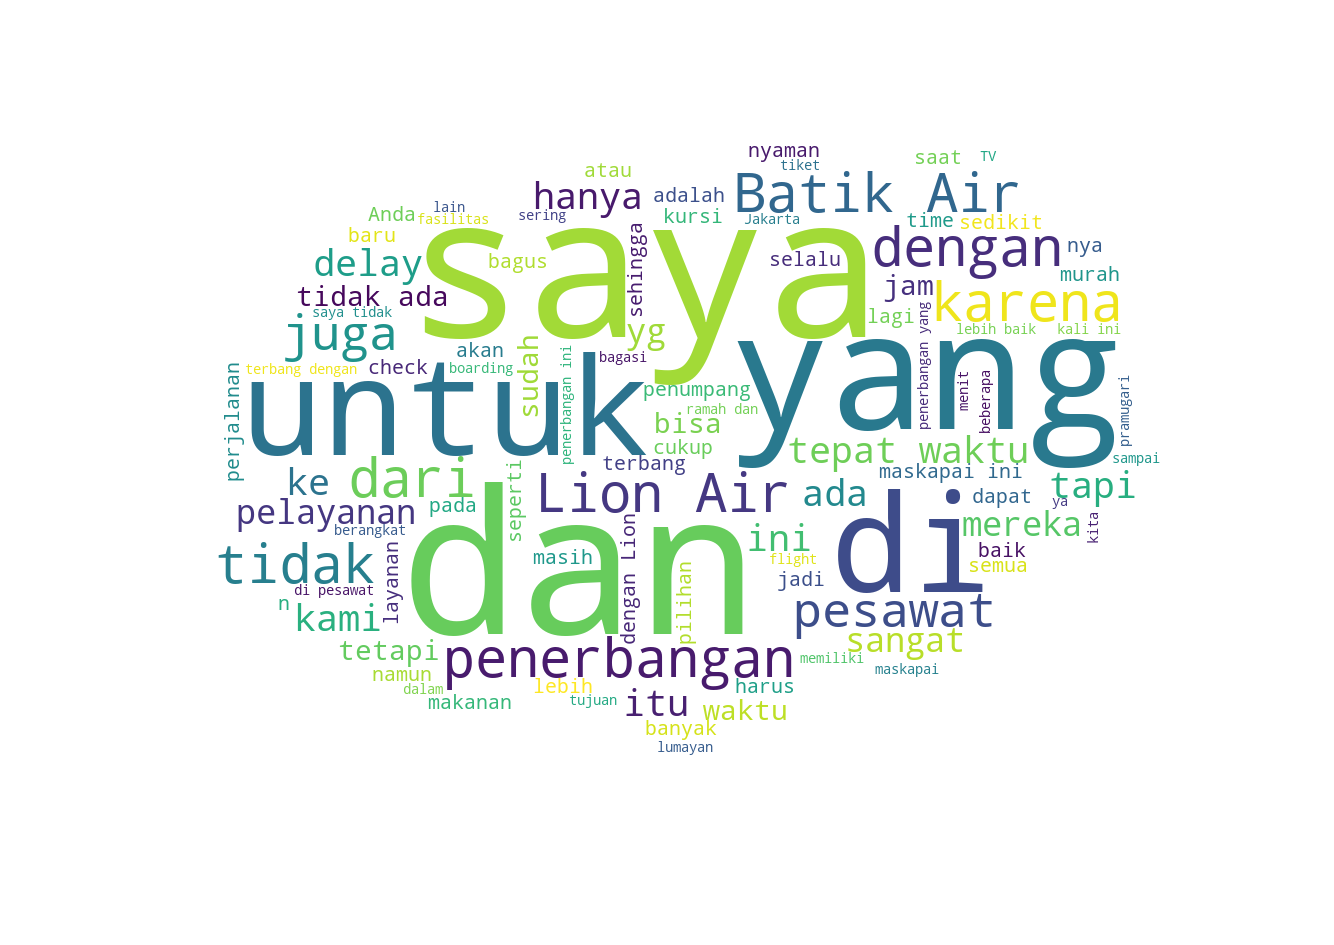

In [53]:
positive_values = df[df["sentiment"]=="positive"]
positive_values = positive_values["review"].values
create_wordcloud(positive_values)

In [59]:
#Menampilkan Kata Yang Sering Digunakan Pada Ulasan Positif
from collections import Counter
c = Counter()

# The 10 most common words
positive_values = df[df["sentiment"]=="positive"]
positive_values = positive_values["review"].values
for txt in positive_values:
    for word in txt.split():
        c[word] += 1
c.most_common(10)  

[('dan', 930),
 ('yang', 893),
 ('saya', 617),
 ('dengan', 573),
 ('di', 551),
 ('tidak', 444),
 ('penerbangan', 428),
 ('untuk', 378),
 ('dari', 353),
 ('ke', 294)]

In [54]:
def create_wordcloud(text):
    mask = np.array(Image.open(r"D:\Tugas Akhir\Text Mining\Data\Data TA\Natural Leangue Classification\cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc negatif.png")
    path="wc negatif.png"
    display(Image.open(path))

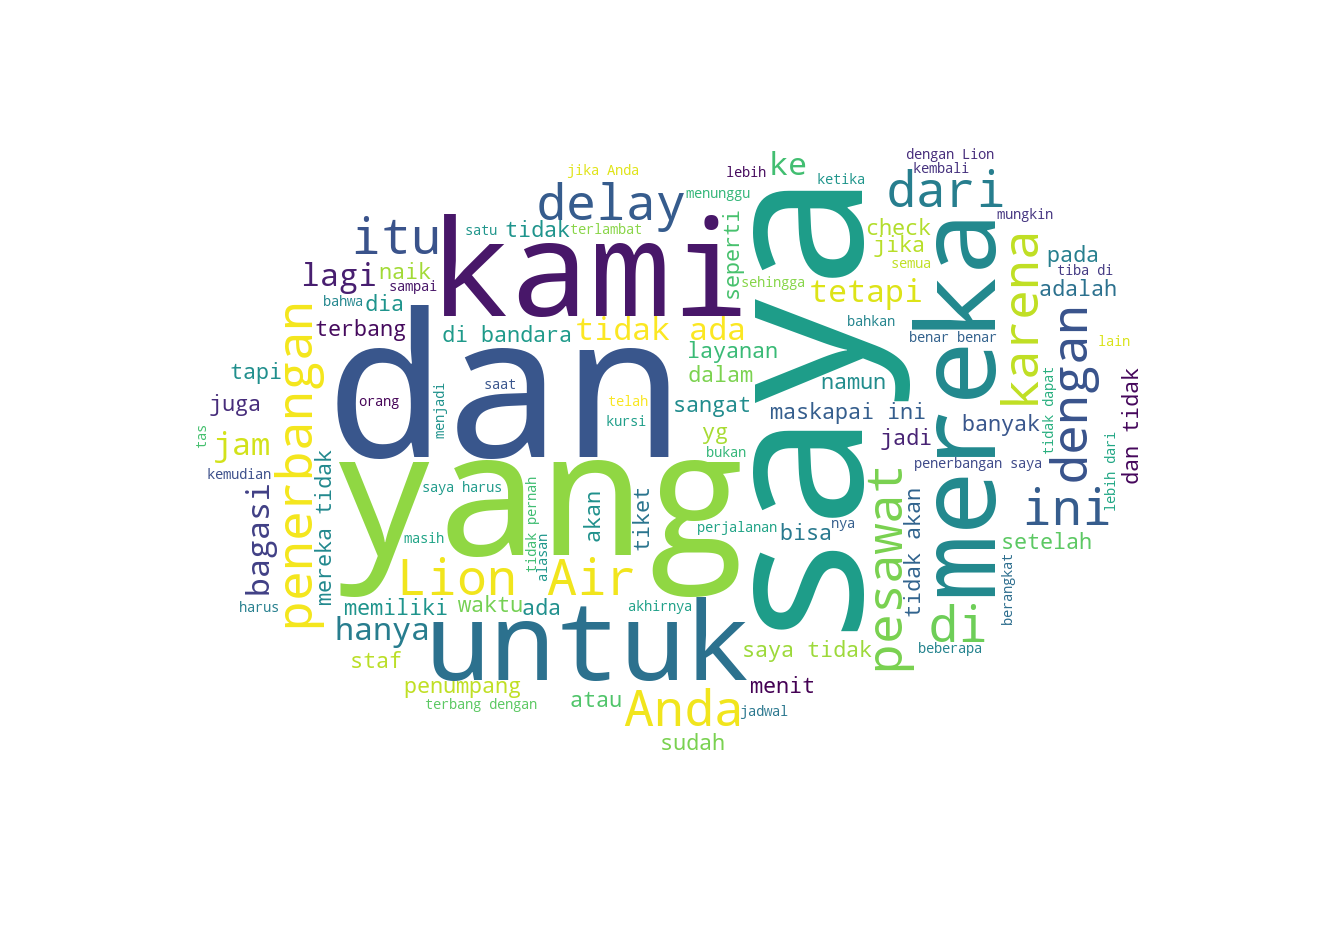

In [55]:
positive_values = df[df["sentiment"]=="negative"]
positive_values = positive_values["review"].values
create_wordcloud(positive_values)

In [60]:
#Menampilkan Kata Yang Sering Digunakan Pada Ulasan Negatif
from collections import Counter
c = Counter()

# The 10 most common words
positive_values = df[df["sentiment"]=="negative"]
positive_values = positive_values["review"].values
for txt in positive_values:
    for word in txt.split():
        c[word] += 1
c.most_common(10)  

[('dan', 1346),
 ('saya', 1330),
 ('yang', 1286),
 ('tidak', 1165),
 ('di', 1017),
 ('untuk', 814),
 ('penerbangan', 746),
 ('kami', 674),
 ('dengan', 651),
 ('ke', 573)]